# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at [FiveThirtyEight](#https://fivethirtyeight.com/) became interesting in answering some questions about *Star Wars* fans. In particular they wondered 

- Does the res of America realize that "the Empire Strikes Back" is clearly yhe best of the bunch? 

They surveyed *Star Wars* fans using the online tool SurveyMonkey. They received 835 total responses, which ou can download [here](#https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

#### The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. This data set needs a lot of cleaning. 

## 1. Import and read data

In [606]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [607]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [608]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [609]:
star_wars.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

In [610]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

** Data overview **
- Response ID ==> 1 null==> row 0 but some ID are the same for ex row 1 and 2
- there are a lot of null data 
- Some columns have not columns name "Unmaned 4:8,10:14,16:28

## 2. Clean Data set

### 2.1 Remove invalid rows in RespondentID

In [611]:
star_wars = star_wars[star_wars['RespondentID'].notnull()] # remove null values 
print(len(star_wars)) # validate 
star_wars.head()

1186


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [612]:
no_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "No"]
no_fan

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific
13,3.292609e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,Greedo,No,NaN,No,Male,18-29,"$25,000 - $49,999",Bachelor degree,South Atlantic
22,3.292521e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,NaN,3,...,Neither favorably nor unfavorably (neutral),I don't understand this question,No,NaN,No,Male,18-29,NaN,Bachelor degree,Pacific
31,3.292367e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Somewhat favorably,I don't understand this question,No,NaN,No,Male,30-44,"$0 - $24,999",High school degree,New England
33,3.292331e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Somewhat unfavorably,Han,No,NaN,No,Male,18-29,NaN,NaN,Middle Atlantic
34,3.292319e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,6,...,NaN,Han,No,NaN,No,Male,18-29,"$50,000 - $99,999",High school degree,Mountain
49,3.292187e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Greedo,No,NaN,No,Male,18-29,"$50,000 - $99,999",Some college or Associate degree,Pacific
60,3.292144e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,NaN,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,I don't understand this question,No,NaN,No,Male,18-29,"$50,000 - $99,999",Bachelor degree,Pacific
65,3.292050e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Somewhat favorably,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",Some colle

In [613]:
#  COPY data set
star_wars_cop = star_wars.copy(deep=True)

### 2.2 Convert columns to boolean

It is easier to work with boolean value especially when the data have two different value (Yes/No, women/men,...)
The two columns below can be convert to boolean :
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

In [614]:
# Convert to boolean
# Create a dictionary to define a mapping from each value in both columns
bool_values = {"Yes": True, "No": False, "NaN": np.nan }
star_wars_cop['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars_cop['Have you seen any of the 6 films in the Star Wars franchise?'].map(bool_values)
star_wars_cop['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars_cop['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(bool_values)

In [615]:
#verification
star_wars_cop['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna= False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [616]:
#verification
star_wars_cop['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna= False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

AS above, we can do the same for the next columns, such as :
- Which of the following Star Wars films have you seen? Please select all that apply. 
    - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
    - Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
    - Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
    - Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
    - Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
    - Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

Indeed the answer as either the name of the movies, either NaN.

In [617]:
# Convert to Boolean
# Create a new dictionary to perform a mapping
dict_star_wars = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True, 
    np.nan: False 
    }
# Apply a map
for i in star_wars_cop.columns[3:9]:
    star_wars_cop[i] = star_wars_cop[i].map(dict_star_wars)
star_wars_cop.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### 2.3 Rename columns

In [618]:
star_wars_cop.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [619]:
# rename columns name 
rename_col = {'Do you consider yourself to be a fan of the Star Wars film franchise?': 'fan_of_starwars',  
                "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
                "Unnamed: 4": "seen_2",
                "Unnamed: 5": "seen_3",
                "Unnamed: 6": "seen_4",
                "Unnamed: 7": "seen_5",
                "Unnamed: 8": "seen_6",
                "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
                "Unnamed: 10" : "ranking_2",
                "Unnamed: 11" : "ranking_3",
                "Unnamed: 12" : "ranking_4",
                "Unnamed: 13" : "ranking_5",
                "Unnamed: 14" : "ranking_6",
                'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'han_solo',
                'Unnamed: 16': 'luke_skywalker',
                'Unnamed: 17': 'princess_leia_organa',
                'Unnamed: 18': 'anakin_skywalker',
                'Unnamed: 19': 'obi_wan_kenobi',
                'Unnamed: 20': 'emperor_palpatine',
                'Unnamed: 21': 'darth_vader',
                'Unnamed: 22': 'lando_calrissian',
                'Unnamed: 23': 'boba_fett',
                'Unnamed: 24': 'c_3po',
                'Unnamed: 25': 'r2_d2',
                'Unnamed: 26': 'jar_jar_binks',
                'Unnamed: 27': 'padme_amidala',
                'Unnamed: 28': 'yoda',
                'Which character shot first?': 'shot_first',
                'Are you familiar with the Expanded Universe?': 'know_eu',
                'Do you consider yourself to be a fan of the Star Trek franchise?': 'fan_of_startreck'
             }
# Apply dF.rename() 
star_wars_cop = star_wars_cop.rename(columns = rename_col)

In [620]:
star_wars_cop.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'fan_of_starwars', 'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5',
       'seen_6', 'ranking_1', 'ranking_2', 'ranking_3', 'ranking_4',
       'ranking_5', 'ranking_6', 'han_solo', 'luke_skywalker',
       'princess_leia_organa', 'anakin_skywalker', 'obi_wan_kenobi',
       'emperor_palpatine', 'darth_vader', 'lando_calrissian', 'boba_fett',
       'c_3po', 'r2_d2', 'jar_jar_binks', 'padme_amidala', 'yoda',
       'shot_first', 'know_eu',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'fan_of_startreck', 'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

### 2.4 Convert to numeric value

We need to convert columns [9:15] to numeric, indeed these columns show us which movies is the favorite (=1), to the least favorite (=6). So each of the following columns contain the value 1:6 and NaN. 

In [621]:
# Convert to numeric through astype(float)
star_wars_cop[star_wars_cop.columns[9:15]] = star_wars_cop[star_wars_cop.columns[9:15]].astype(float)

Now that we cleaned up the ranking columns, we can find the highest-ranked movie more quickly. 

## 3. Analyze

### 3.1 Find the most favorite movie

In [622]:
# Calcul the mean of ranking
mean_rank = {}
for i in range(1,7):
    mean = star_wars_cop["ranking_{}".format(i)].mean()
    mean_rank["ranking_{}".format(i)] = mean

mean_rank

{'ranking_1': 3.7329341317365268,
 'ranking_2': 4.087320574162679,
 'ranking_3': 4.341317365269461,
 'ranking_4': 3.272727272727273,
 'ranking_5': 2.513157894736842,
 'ranking_6': 3.047846889952153}

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


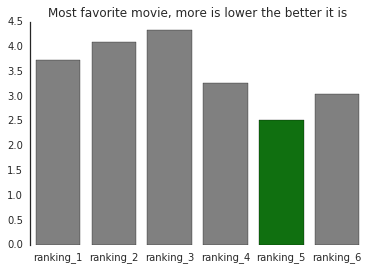

In [623]:
mean_rank = pd.Series(mean_rank) #convert to serie in order to plot
sns.set_style("white") #aesthetics
colors = ('green' if x == min(mean_rank) else 'grey' for x in mean_rank)
ax = sns.barplot(x = star_wars_cop.columns[9:15], y = mean_rank, palette = colors)
sns.despine(right = True, top = True, bottom = True)
ax.set_title("Most favorite movie, more is lower the better it is")
plt.show()

The movie 5, Star Wars: Episode V The Empire Strikes Back, is the most favorite Star Wars according to the fans throught this survey

### 3.2 Find the most seen movie

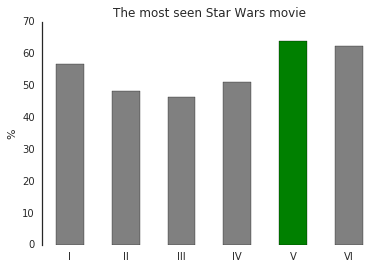

In [624]:
# the most seen is the percentage of each column between star_wars_cop[3:9]
# seen_most_1 = (star_wars_cop["seen_1"][(star_wars_cop["seen_1"] == True)].value_counts() / len(star_wars_cop) ) *100
# seen_most_2 = (star_wars_cop["seen_2"][(star_wars_cop["seen_2"] == True)].value_counts() / len(star_wars_cop) ) *100

#iterate in all star_wars_cop["seen_i"] as we did above and create a new list
seen_most = [(star_wars_cop[i][(star_wars_cop[i] == True)].value_counts() / len(star_wars_cop) ) *100 for i in star_wars_cop.columns[3:9]]
#Select only the value and transform the list as a Serie to plot it
seen_most = pd.Series([seen_most[i][1] for i in range(0,len(seen_most))])

colors = ("green" if x == seen_most.max() else 'grey' for x in seen_most)
seen_most.plot(kind='bar',color = colors)
plt.xticks([0, 1, 2, 3, 4, 5], ['I', 'II', 'III','IV', 'V', 'VI'], rotation = 0)
plt.ylabel("%")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.title('The most seen Star Wars movie')

The movie the most seen is Star Wars V : The Empire Strikes Back

### 3.3 Analyze how certain segments of the survey population responded

Split the data below in two groups based on one of the binary columns :

- A. Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- B. Gender - Male or Female
- C. Age Categorie 

In [625]:
star_wars_cop["fan_of_starwars"].value_counts()

True     552
False    284
Name: fan_of_starwars, dtype: int64

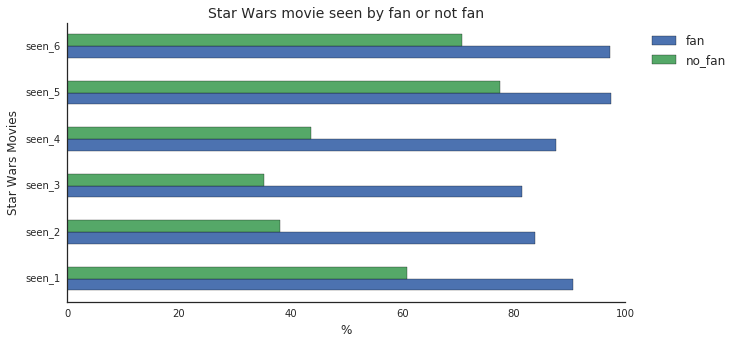

In [626]:
#Split A 
# star_wars_cop.rename({'Do you consider yourself to be a fan of the Star Wars film franchise?': 'fan_of_starwars'}, axis=1, inplace=True)
# Filter out fans or no fans of Star Wars franchise
fan = star_wars_cop[star_wars_cop["fan_of_starwars"]== True]
no_fan = star_wars_cop[star_wars_cop["fan_of_starwars"]== False]

#Calcul the percentage per movie
seen_fans_per = (fan[fan.columns[3:9]].sum() / len(fan))*100
seen_no_fans_per = (no_fan[no_fan.columns[3:9]].sum() / len(no_fan))*100

# Create a DF to plot
no_yes_fan = pd.DataFrame({"fan":seen_fans_per ,"no_fan":seen_no_fans_per})  
no_yes_fan.plot.barh(figsize=(10,5))
plt.title('Star Wars movie seen by fan or not fan', fontsize = 14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.9), fontsize = 12)
plt.ylabel("Star Wars Movies", fontsize = 12)
plt.xlabel("%", fontsize = 12)
plt.show()

- The most famous one is the Star Wars V either by the fan and no fan of star Wars. 
- The most seen one is Star Wars V, then the VI by either a fan or no fan person.

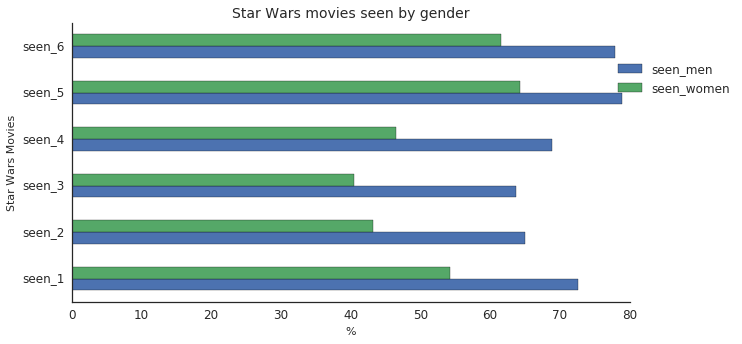

In [627]:
# Split B
#filter 
female = star_wars_cop[star_wars_cop['Gender'] == 'Female']
male = star_wars_cop[star_wars_cop['Gender'] == 'Male']

# Calcul percentage 
seen_female = (female[female.columns[3:9]].sum() / len(female))*100
seen_male = (male[male.columns[3:9]].sum()/len(male))*100

seen_male_female = pd.DataFrame({"seen_women":seen_female, "seen_men":seen_male}) # Create a DataFrame

#Plot
seen_male_female.plot.barh(figsize=(10,5))
plt.title('Star Wars movies seen by gender', fontsize = 14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.8), fontsize = 12)
plt.xlabel("%")
plt.ylabel("Star Wars Movies")
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()


- The famous Star Wars movie is still the n°5 either by men and women. There is some difference between gender, men prefer the first shooting session.
- The n°5 is still the most seen Star Wars movie. 

In [628]:
star_wars_cop['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

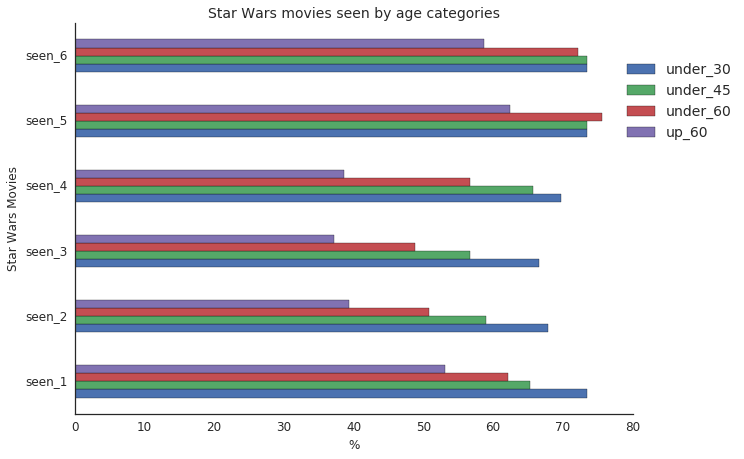

In [629]:
under_30 = star_wars_cop[star_wars_cop['Age'] == '18-29']
under_45 = star_wars_cop[star_wars_cop['Age'] == '30-44']
under_60 = star_wars_cop[star_wars_cop['Age'] == '45-60']
up_60 = star_wars_cop[star_wars_cop['Age'] == '> 60']

# Calcul percentage 
under_30_per = (under_30[under_30.columns[3:9]].sum() / len(under_30))*100
under_45_per = (under_45[under_45.columns[3:9]].sum()/len(under_45))*100
under_60_per = (under_60[under_60.columns[3:9]].sum()/len(under_60))*100
up_60_per = (up_60[up_60.columns[3:9]].sum()/len(up_60))*100

#Create a DF
age_per = pd.DataFrame({"under_30" : under_30_per,
            "under_45" : under_45_per,
            "under_60" : under_60_per,
            "up_60" : up_60_per  
            })

#Plot
age_per.plot.barh(figsize=(10,7))
plt.title('Star Wars movies seen by age categories', fontsize = 14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.8), fontsize = 14)
plt.xlabel("%", fontsize = 12)
plt.ylabel("Star Wars Movies", fontsize =12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

People under 30 have most seen the first three movies, corresponding to the last movies releases in chronological time. 
People older than 60 haven't seen a lot of Star Wars movie. 
The Star Wars 5 was seen by more than 75% in all category of age except older one. 

### 3.4 Which character do respondents like/dislike the most?

To answer we need to clean the columns 15 to 29.
These columns correspond to the appreciation of characters : 
- Very favorable
- Somewhat favorably
- Neither favorably nor unfavorably (neutral)
- Unfamiliar (N/A) 
- Somewhat unfavorably
- Very unfavorably 
- NaN

We need to change character rating responses 

In [630]:
star_wars_cop.iloc[:,[15,16,17,18,19,20,21,22,23,24,25]]

,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c_3po,r2_d2
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably
6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably
7,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably
8,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably
9,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably
10,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably


In [631]:
star_wars_cop['han_solo'].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: han_solo, dtype: int64

In [632]:
#Create a dict to change character rating and then map
mapping_characters = { "Very favorably" : 5,
                      "Somewhat favorably" : 4,
                      "Neither favorably nor unfavorably (neutral)" : 3,
                      "Somewhat unfavorably " : 2,
                      "Very unfavorably " : 1,
                      "Unfamiliar (N/A) " : np.nan
                        }
# Apply a mapin the differents columns
for i in star_wars_cop.columns[15:25]:
    star_wars_cop[i] = star_wars_cop[i].map(mapping_characters)

star_wars_cop['han_solo'].head() #verification

1    5.0
2    NaN
3    4.0
4    5.0
5    5.0
Name: han_solo, dtype: float64

(array([0., 1., 2., 3., 4., 5.]), <a list of 6 Text xticklabel objects>)

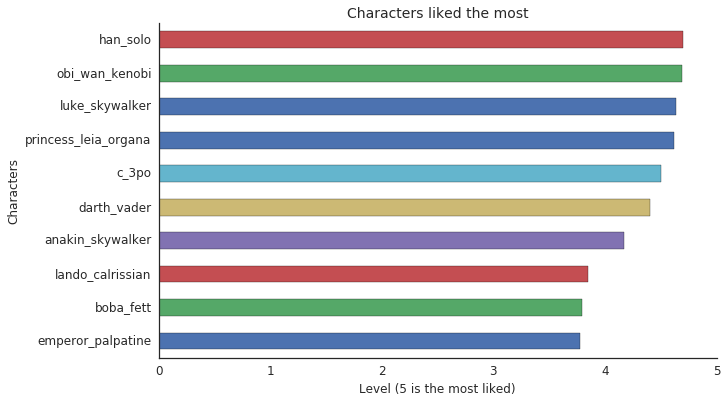

In [646]:
#Calculate the average and then plot
characters_avg = (star_wars_cop[star_wars_cop.columns[15:29]].mean()).sort_values()

characters_avg.plot.barh(figsize=(10,6))
plt.title('Characters liked the most', fontsize = 14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Level (5 is the most liked)", fontsize = 12)
plt.ylabel("Characters", fontsize =12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


Han, Luke, Leia, Obi Wan, C3PO, R2D2 and Yoda are all ranked much higher than the rest and are all on the good side in the orginal trilogy. Those characters who are ranked less favourably either come from the prequal trilogy like Anakin and Padme or they are Evil characters like Darth Vader or Palpatine.

### 3.4 Which character do respondents like/dislike the most by fans and no fans?

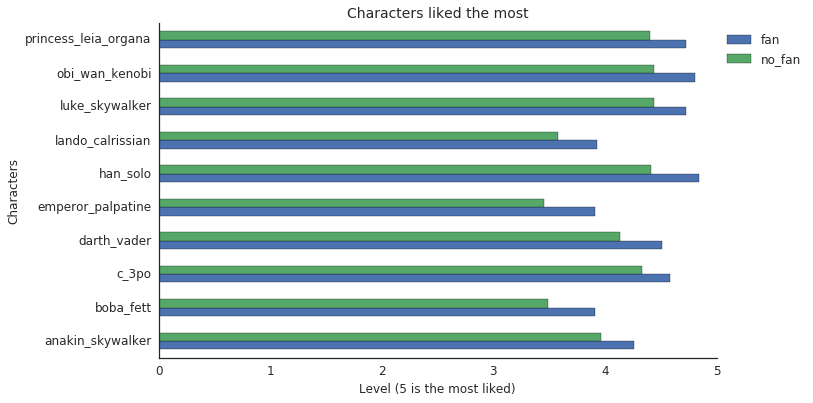

In [662]:
#Filter
fan = star_wars_cop[star_wars_cop["fan_of_starwars"]== True]
no_fan = star_wars_cop[star_wars_cop["fan_of_starwars"]== False]

#Average character
characters_fan = fan[fan.columns[15:29]].mean().sort_values()
characters_no_fan = no_fan[no_fan.columns[15:29]].mean().sort_values()

#Create DF
fan_char = pd.DataFrame({"fan" : characters_fan, "no_fan" : characters_no_fan})
fan_char.plot.barh(figsize =(10,6))
plt.title('Characters liked the most', fontsize = 14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Level (5 is the most liked)", fontsize = 12)
plt.ylabel("Characters", fontsize =12)
plt.legend(loc='best', bbox_to_anchor = (1,1), fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()


Fans and no fans alike have fairly similar thoughts about each character. The only character that non fans like more than fans do is Jar Jar Binks.

# Conclusion

- The Star Wars movie that has been seen the most and the most popular too is **The Empire Strikes back**
- The first trilogy is more popular than the prequal trilogy.
- The gap in popularity between the two trilogies is much larger amongst fans than non fans. 